# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [3]:
#TESTING CELL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'    #q={city name}
url = f'{base_url}q=denver&appid={api_key}'
#http://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=bcb2864050b075eb315a0476dd19beb2
#print(url)
response = requests.get(url)
info = response.json()
#print(json.dumps(info,indent=4,sort_keys=True))


https://api.openweathermap.org/data/2.5/weather?q=denver&appid=bcb2864050b075eb315a0476dd19beb2


In [30]:
#TESTING CELL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'    
params = {'q':'denver',
        'appid': api_key}

url = requests.get(base_url,params=params)
response = url.json()

#print(json.dumps(response,indent=4,sort_keys=True))

cloudiness = response['clouds']['all']
country = response['sys']['country']
date = response['dt']
humidity = response['main']['humidity']
lat = response['coord']['lat']
lng = response['coord']['lon']
max_temp = response['main']['temp_max']
wind_speed = response['wind']['speed']

print(cloudiness)

90


In [67]:
# creating the dataframe 
df= pd.DataFrame(cities)
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""
df = df.rename(columns={0: 'City'}) 
#df.head()

In [38]:
#TESTING CELL


base_url = 'https://api.openweathermap.org/data/2.5/weather?'    
params = {'appid': api_key}

record = 0
#loop through df and pull city name and use as param for q
for index, row in df.iterrows():
    
    city = row['City']
    params['q'] = city
    
    url = requests.get(base_url,params=params)
    response = url.json()
    
    print(f"Processing Record {record} of Set 1 | {city}")
  
    #print(url.url)
    
    try:
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country']  = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except(KeyError):
        print("NA")
    
    record = record + 1


Processing Record 0 of Set 1 | aklavik
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | ust-kuyga
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | achisay
NA
Processing Record 10 of Set 1 | omboue
Processing Record 11 of Set 1 | sentyabrskiy
NA
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | inhambane
Processing Record 14 of Set 1 | ust-kan
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | nicoya
Processing Record 20 of Set 1 | khudumelapye
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | port elizabeth
Processing Record 24 o

Processing Record 195 of Set 1 | meyungs
NA
Processing Record 196 of Set 1 | susanville
Processing Record 197 of Set 1 | stornoway
NA
Processing Record 198 of Set 1 | bolungarvik
NA
Processing Record 199 of Set 1 | garowe
Processing Record 200 of Set 1 | hamilton
Processing Record 201 of Set 1 | san andres
Processing Record 202 of Set 1 | guerrero negro
Processing Record 203 of Set 1 | jinchengjiang
NA
Processing Record 204 of Set 1 | kavieng
Processing Record 205 of Set 1 | asyut
Processing Record 206 of Set 1 | dudinka
Processing Record 207 of Set 1 | clyde river
Processing Record 208 of Set 1 | klaksvik
Processing Record 209 of Set 1 | nakusp
Processing Record 210 of Set 1 | khor
Processing Record 211 of Set 1 | bronnoysund
Processing Record 212 of Set 1 | san luis
Processing Record 213 of Set 1 | meadow lake
Processing Record 214 of Set 1 | okha
Processing Record 215 of Set 1 | iqaluit
Processing Record 216 of Set 1 | ponta do sol
Processing Record 217 of Set 1 | enid
Processing Re

Processing Record 386 of Set 1 | kuala terengganu
Processing Record 387 of Set 1 | krasnyy chikoy
Processing Record 388 of Set 1 | grand centre
NA
Processing Record 389 of Set 1 | amapa
Processing Record 390 of Set 1 | coihaique
Processing Record 391 of Set 1 | nguiu
NA
Processing Record 392 of Set 1 | kushima
Processing Record 393 of Set 1 | igarka
Processing Record 394 of Set 1 | saint-malo
Processing Record 395 of Set 1 | kapit
Processing Record 396 of Set 1 | mandali
Processing Record 397 of Set 1 | baykalsk
Processing Record 398 of Set 1 | praia
Processing Record 399 of Set 1 | saint-francois
Processing Record 400 of Set 1 | izhma
Processing Record 401 of Set 1 | dunedin
Processing Record 402 of Set 1 | amderma
NA
Processing Record 403 of Set 1 | port hedland
Processing Record 404 of Set 1 | vilhena
Processing Record 405 of Set 1 | jalingo
Processing Record 406 of Set 1 | alta floresta
Processing Record 407 of Set 1 | portland
Processing Record 408 of Set 1 | svolvaer
Processing R

Processing Record 578 of Set 1 | kamaishi
Processing Record 579 of Set 1 | pinega
Processing Record 580 of Set 1 | nizwa
Processing Record 581 of Set 1 | orel
Processing Record 582 of Set 1 | marsh harbour
Processing Record 583 of Set 1 | san patricio
Processing Record 584 of Set 1 | meulaboh
Processing Record 585 of Set 1 | bacuit
NA
Processing Record 586 of Set 1 | mariakani
Processing Record 587 of Set 1 | velsk
Processing Record 588 of Set 1 | honiara
Processing Record 589 of Set 1 | vanavara
Processing Record 590 of Set 1 | aitape
Processing Record 591 of Set 1 | ternate
Processing Record 592 of Set 1 | camacha
Processing Record 593 of Set 1 | lake havasu city
Processing Record 594 of Set 1 | pallasovka
Processing Record 595 of Set 1 | sartell
Processing Record 596 of Set 1 | mayumba
Processing Record 597 of Set 1 | wanning
Processing Record 598 of Set 1 | peniche
Processing Record 599 of Set 1 | vardo
Processing Record 600 of Set 1 | oulu
Processing Record 601 of Set 1 | madisonv

In [39]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aklavik,90,CA,1540947600,85,68.22,-135.01,263.15,3.6
1,cape town,75,ZA,1540947720,76,-33.93,18.42,284.15,4.1
2,jamestown,0,AU,1540949874,31,-33.21,138.6,304.974,4.72
3,hilo,1,US,1540947360,51,19.71,-155.08,303.75,6.7
4,bethel,90,US,1540949100,92,60.79,-161.76,278.15,4.6


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
df.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

ValueError: could not convert string to float: 

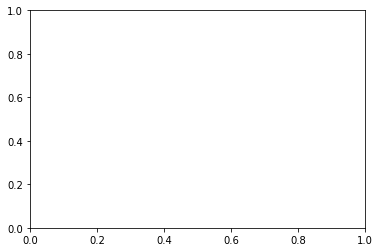

In [66]:
#testing Cell when done paste above 
lat_temp = df[['Lat','Max Temp']]
lat_temp = df.rename(columns={'Max Temp': 'Max_Temp'}) 
#lat_temp.head()
lat_temp.dtypes
lat_temps = plt.scatter(lat_temp.Lat,lat_temp.Max_Temp)


#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot